<a href="https://colab.research.google.com/github/samantamrityunjay/ICDcoding/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
import re
import matplotlib.pyplot as plt
%matplotlib inline

Code to mount google drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# All MIMIC III

<h3> Tables 'adm_icd' and 'diagnoses_icd'
<p>'adm_icd' contains all the Admission Ids of the MIMIC database. <br>
There are total <strong><u>58976</u></strong> admisssion ids.</p>
 <p>Out of which <strong><u>47</u></strong>  do not have any ICD9 codes corresponding to them (NaN values). So we have total of <strong><u>58929</u></strong> in this table with correponding ICD9 codes and converted ICD10 codes.
 <p>There are <strong><u>6984</u></strong>unique ICD9 codes and <strong><u>942</u></strong> ICD9 categories.

In [ ]:
allmimic=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/DIAGNOSES_ICD.csv')

In [ ]:
allmimic

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [ ]:
# unique admission records
allmimic.HADM_ID.nunique()

58976

In [ ]:
# number of unique ICD9 codes
allmimic.ICD9_CODE.nunique()

6984

In [ ]:
# number of unique patients
allmimic.SUBJECT_ID.nunique()

46520

In [ ]:
# finding if there is null HADM_ID or not 
allmimic.loc[allmimic.HADM_ID.isna()].HADM_ID

Series([], Name: HADM_ID, dtype: int64)

In [ ]:
# finding if there is null ICD9 code or not
allmimic.loc[allmimic.ICD9_CODE.isna()].HADM_ID.count()

47

In [ ]:
# all admids that do not have icd9code with them
admids_without_icd9code=allmimic.loc[allmimic.ICD9_CODE.isna()].HADM_ID.to_list()

In [ ]:
print(len(admids_without_icd9code))
print(admids_without_icd9code)

47
[102633, 174817, 177274, 135580, 126808, 159800, 170307, 111608, 116945, 184025, 171183, 108282, 188023, 123220, 129620, 113170, 154602, 148742, 190435, 160049, 110220, 102096, 176570, 199739, 186323, 196087, 144751, 142890, 140889, 194017, 119146, 186175, 163059, 105970, 152077, 166997, 109963, 152368, 182322, 196643, 104588, 154166, 173766, 153208, 182252, 110368, 112990]


To have toplevel category (ICD9 category) from ICD9 code following conversion is required:
> "The code field for the ICD-9-CM Principal and Other Diagnosis Codes is six characters in length, with the decimal point implied between the third and fourth digit for all diagnosis codes other than the V codes. The decimal is implied for V codes between the second and third digit." [LINK](https://mimic.physionet.org/mimictables/diagnoses_icd/)


In [ ]:
# convering ICD9code to ICD9 category
def icd9category(x):
  """
   This function takes ICD9 CODE and extracts
   the ICD9 CATEGORY
  """

  if type(x)==str:
    return re.split("(\d{3}|V\d{2}|E\d{3})",x)[1]
  else:
    return None

In [ ]:
# Testing the function
icd9category('84589')

'845'

In [ ]:
allmimic['ICD9_CATEGORY']=allmimic.ICD9_CODE.apply(icd9category)

In [ ]:
allmimic

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425
...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,202
651043,639799,97503,188195,3.0,V5869,V58
651044,639800,97503,188195,4.0,V1279,V12
651045,639801,97503,188195,5.0,5275,527


In [ ]:
# find ICD9 codes starting with E or V
allmimic.loc[allmimic.ICD9_CODE.str.contains('[VE]\d*',regex=True,na=False)]

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
27,1324,109,173633,14.0,V4511,V45
54,1514,115,114585,13.0,V1000,V10
55,1515,115,114585,14.0,V453,V45
56,1516,115,114585,15.0,V5865,V58
59,1519,115,114585,18.0,E9320,E932
...,...,...,...,...,...,...
651021,639777,97488,161999,22.0,E8798,E879
651023,639779,97488,161999,24.0,V4986,V49
651039,639795,97497,168949,8.0,V5861,V58
651043,639799,97503,188195,3.0,V5869,V58


In [ ]:
# finding if there is null ICD9 category or not
allmimic.loc[allmimic.ICD9_CATEGORY.isna()].HADM_ID.count()

47

In [ ]:
# admids that do not have ICD9 category 
admids_without_icd9category=allmimic.loc[allmimic.ICD9_CATEGORY.isna()].HADM_ID.to_list()

In [ ]:
print(len(admids_without_icd9category))
print(admids_without_icd9category)

47
[102633, 174817, 177274, 135580, 126808, 159800, 170307, 111608, 116945, 184025, 171183, 108282, 188023, 123220, 129620, 113170, 154602, 148742, 190435, 160049, 110220, 102096, 176570, 199739, 186323, 196087, 144751, 142890, 140889, 194017, 119146, 186175, 163059, 105970, 152077, 166997, 109963, 152368, 182322, 196643, 104588, 154166, 173766, 153208, 182252, 110368, 112990]


In [ ]:
# comparing two lists
compare_two_lists=lambda x,y:Counter(x)==Counter(y)

In [ ]:
# finding if the list of admids without ICD9 code and ICD9 category are the same
compare_two_lists(admids_without_icd9category,admids_without_icd9code)

True

In [ ]:
# number of unique ICD9 categories
allmimic.ICD9_CATEGORY.nunique()

1070

In [ ]:
# removing those admids which do not have ICD9 codes
allmimic_withICDcodes=allmimic.dropna(subset=['ICD9_CODE'])

In [ ]:
allmimic_withICDcodes

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425
...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,202
651043,639799,97503,188195,3.0,V5869,V58
651044,639800,97503,188195,4.0,V1279,V12
651045,639801,97503,188195,5.0,5275,527


In [ ]:
# ALL ICD9 codes of mimic dataset
all_icd9codes=sorted(dict(Counter(allmimic.ICD9_CODE.to_list())).items(),key=lambda x:x[1],reverse=True)

In [ ]:
top10_icd9code=all_icd9codes[:10]

In [ ]:
print(top10_icd9code)

[('4019', 20703), ('4280', 13111), ('42731', 12891), ('41401', 12429), ('5849', 9119), ('25000', 9058), ('2724', 8690), ('51881', 7497), ('5990', 6555), ('53081', 6326)]


In [ ]:
def_icd9code=pd.read_csv(r'/content/drive/MyDrive/AlgoIntern/Data/D_ICD_DIAGNOSES.csv')

In [ ]:
def_icd9code

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V7399,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V740,Screening for cholera,Screening examination for cholera
14564,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V742,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [ ]:
top10_table=pd.DataFrame.from_dict({'ICD9_CODE':[i[0] for i in top10_icd9code],
                                    'Desc':[def_icd9code.loc[def_icd9code.ICD9_CODE==i[0]].SHORT_TITLE.item() for i in top10_icd9code]})

In [ ]:
top10_table

,ICD9_CODE,Desc
0,4019,Hypertension NOS
1,4280,CHF NOS
2,42731,Atrial fibrillation
3,41401,Crnry athrscl natve vssl
4,5849,Acute kidney failure NOS
5,25000,DMII wo cmp nt st uncntr
6,2724,Hyperlipidemia NEC/NOS
7,51881,Acute respiratry failure
8,5990,Urin tract infection NOS
9,53081,Esophageal reflux


In [ ]:
allmimic_withICDcodes

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425
...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,202
651043,639799,97503,188195,3.0,V5869,V58
651044,639800,97503,188195,4.0,V1279,V12
651045,639801,97503,188195,5.0,5275,527


In [ ]:
# grouping by admids 
allmimic_groupbyHADMID=allmimic_withICDcodes[['HADM_ID','ICD9_CODE','ICD9_CATEGORY']].groupby('HADM_ID',as_index=False).aggregate({'ICD9_CODE':lambda x:','.join(x),
            'ICD9_CATEGORY':lambda x:','.join(x)
            })

In [ ]:
allmimic_groupbyHADMID

,HADM_ID,ICD9_CODE,ICD9_CATEGORY
0,100001,"25013,3371,5849,5780,V5867,25063,5363,4580,250...","250,337,584,578,V58,250,536,458,250,403,585,25..."
1,100003,"53100,2851,07054,5715,45621,53789,4019,53550,7823","531,285,070,571,456,537,401,535,782"
2,100006,"49320,51881,486,20300,2761,7850,3090,V1251,V1582","493,518,486,203,276,785,309,V12,V15"
3,100007,"56081,5570,9973,486,4019","560,557,997,486,401"
4,100009,"41401,99604,4142,25000,27800,V8535,4148,4111,V...","414,996,414,250,278,V85,414,411,V45,V15,285,40..."
...,...,...,...
58924,199993,"41031,42821,42731,4271,5180,4240,2760,5119,5184","410,428,427,427,518,424,276,511,518"
58925,199994,"486,4280,51881,3970,496,4169,585,42732,2762","486,428,518,397,496,416,585,427,276"
58926,199995,"4210,7464,42971,30401,4412,44284,V1259,04111,3...","421,746,429,304,441,442,V12,041,305,305"
58927,199998,"41401,9971,9975,42731,78820,4111,V4582,E8782,4...","414,997,997,427,788,411,V45,E878,429,440,401,4..."


In [ ]:
def convert_to_list(x):
  return list(set(re.split(',',x)))

In [ ]:
allmimic_groupbyHADMID['ICD9_CODE']=allmimic_groupbyHADMID['ICD9_CODE'].apply(convert_to_list)
allmimic_groupbyHADMID['ICD9_CATEGORY']=allmimic_groupbyHADMID['ICD9_CATEGORY'].apply(convert_to_list)

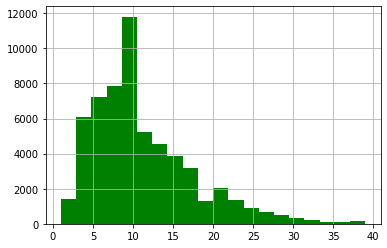

In [ ]:
# frequency distribution of number of ICD codes for each admids
plt.hist(allmimic_groupbyHADMID.ICD9_CODE.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)

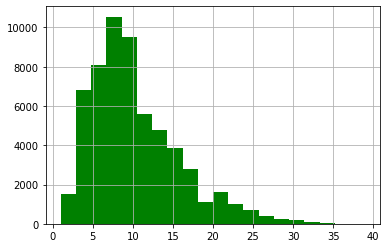

In [ ]:
# frequency distribution of number of ICD categories for each admids
plt.hist(allmimic_groupbyHADMID.ICD9_CATEGORY.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)

# NOTEEVENTS

In [ ]:
# all noteevents data
noteevents=pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/NOTEEVENTS.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
noteevents

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637.0,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637.0,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637.0,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637.0,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


In [ ]:
# unique number of admids in noteevents table
noteevents.HADM_ID.nunique()

58361

In [ ]:
# there are notes that donot  have admids
noteevents.loc[noteevents.HADM_ID.isna()].ROW_ID.count()

231836

In [ ]:
# all the admids of the notevents table 
admids_noteevents=list(set([item for item in  noteevents.loc[~noteevents.HADM_ID.isna()].HADM_ID.to_list()]))

In [ ]:
len(admids_noteevents)

58361

In [ ]:
# getting ICD codes for each admid of notevents table
noteevents_icd=allmimc_groupbyHADMID.loc[allmimic_groupbyHADMID.HADM_ID.isin(admids_noteevents)]

In [ ]:
noteevents_icd

,HADM_ID,ICD9_CODE,ICD9_CATEGORY
0,100001,"[5849, 5363, 25063, 25043, 5853, 36201, 25013,...","[585, 707, 403, 362, 250, V13, 584, 536, 337, ..."
1,100003,"[53789, 4019, 2851, 5715, 07054, 53100, 53550,...","[531, 401, 537, 535, 782, 456, 070, 285, 571]"
2,100006,"[V1251, 20300, 7850, V1582, 51881, 3090, 2761,...","[493, 309, 486, V15, 276, 518, V12, 785, 203]"
3,100007,"[56081, 4019, 9973, 5570, 486]","[401, 557, 486, 997, 560]"
4,100009,"[4262, 44021, 4142, 4111, 4019, V1582, V153, 2...","[401, V58, 250, 272, 411, 996, V15, 440, V45, ..."
...,...,...,...
58924,199993,"[5180, 5184, 4240, 42821, 42731, 2760, 5119, 4...","[511, 518, 424, 276, 428, 410, 427]"
58925,199994,"[585, 496, 3970, 51881, 4280, 42732, 486, 2762...","[585, 496, 427, 486, 276, 428, 416, 397, 518]"
58926,199995,"[4210, 30401, V1259, 04111, 42971, 3051, 44284...","[305, 421, 746, 441, 304, 041, 442, 429, V12]"
58927,199998,"[4293, 4111, 4019, 2724, 51889, V4589, 4400, E...","[788, 443, 401, 518, 272, 411, E878, 440, V45,..."


In [ ]:
#noteevent admids that do not have ICD codes
admids_noteevents_withoutICD=list(set(admids_noteevents) - set(noteevents_icd.HADM_ID.to_list()))

In [ ]:
len(admids_noteevents_withoutICD)

33

In [ ]:
# noteevents admids without icdcodes are subset of allmimic admids without ICD codes
set(admids_noteevents_withoutICD).issubset(set(admids_without_icd9code))

True

In [ ]:
# total ICD9 codes for notevents table 
total_icd9codes_noteevents=list(set([item for innerlist in noteevents_icd.ICD9_CODE.to_list() for item in innerlist]))

In [ ]:
len(total_icd9codes_noteevents)

6967

In [ ]:
# total ICD9 categories for noteevents table
total_icd9categories_noteevents=list(set([item for innerlist in noteevents_icd.ICD9_CATEGORY.to_list() for item in innerlist]))

In [ ]:
len(total_icd9categories_noteevents)

1070

In [ ]:
# different categories of notes in noteevents
different_note_category=noteevents.CATEGORY.unique().tolist()

category_hadmids={'category':[],'Number_of_admissions':[]}
for i in different_note_category:
  category_hadmids['category'].append(i)
  category_hadmids['Number_of_admissions'].append(noteevents.loc[noteevents.CATEGORY==i].HADM_ID.nunique())
pd.DataFrame.from_dict(category_hadmids)

,category,Number_of_admissions
0,Discharge summary,52726
1,Echo,23585
2,ECG,44185
3,Nursing,9070
4,Physician,8983
5,Rehab Services,2249
6,Case Management,619
7,Respiratory,3986
8,Nutrition,3167
9,General,3170


# Discharge Summaries

>'notes_icd' contains merged tables of 'adm_ids' and 'discharge summarry table'
>> There are total <strong><u>52726</u></strong><sup>*</sup> admission ids in discharge summary, with corresponding <strong><u>6919</u></strong> ICD9 codes and <strong><u>941</u></strong> ICD9 categories.<br>
<sup>*</sup>4 (actually 6 but 4 are unique) do not have any corresponding ICD codes. These are part of 47 discussed above

In [ ]:
notes_icd=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/Data1.0/notes_icd.csv')

In [ ]:
notes_icd

,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,ISERROR,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs
0,22532,167853.0,Discharge summary,Report,NaN,Admission Date: [**2151-7-16**] Dischar...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Servic...",['service: addendum: radiologic studies: ...,service: addendum: radiologic studies: ra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"01193,4254,4254,42731,2639,2762,5070,5119,2113","Misc,I425,I428,I4891,E46,E872,J690,J918,Misc","4542,3491,3491,3893,3891","Misc,0W9.93ZZ,0W9.B3ZZ,Misc,Misc"
1,13702,107527.0,Discharge summary,Report,NaN,Admission Date: [**2118-6-2**] Discharg...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Birth:...",[' service: micu and then to <name> medicine ...,service: micu and then to <name> medicine ...,"social history: lives with her husband, dr. ...",family history: noncontributory.,past medical history: 1. copd. last pulmona...,NaN,discharge medications: 1. levothyroxine 75 mc...,NaN,NaN,allergies: norvasc leads to lightheadedness ...,NaN,"5191,49121,51881,51881,486,2761,2449,311","Misc,Misc,J9600,J9690,J189,E871,E039,F329","9390,9390,9390,966,966,966,3199,9671,9671,9604...","5A0.9357,5A0.9457,5A0.9557,0DH.67UZ,0DH.68UZ,3..."
2,13702,167118.0,Discharge summary,Report,NaN,Admission Date: [**2119-5-4**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Servic...","[' service: cardiothoracic ', ' social hist...",service: cardiothoracic,social history: social history: the patient ...,family history: family history: (+) fhx cad;...,past medical history: copd flare [**6-7**] s...,"chief complaint: 81 yo f smoker w/ copd, sev...",discharge medications: 1. albuterol sulfate ...,discharge disposition: extended care faci...,"discharge diagnosis: copd, coronary artery di...",allergies: amlodipine attending:<name>,physical exam: admit h+p general-lovely 81 ...,"5191,5185,496,2762,45340,5533","Misc,Misc,J449,E872,Misc,Misc","3179,311,9672,9605,9605,9605,9605,9605,9605,96...","Misc,Misc,5A1.955Z,0B7.17DZ,0B7.18DZ,0BH.07DZ,..."
3,13702,196489.0,Discharge summary,Report,NaN,Admission Date: [**2124-7-21**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Servic...","[' service: medicine ', ' social history: ...",service: medicine,social history: the patient is married and w...,family history: (+) fhx cad; father with an ...,past medical history: # copd flare fev1 40% ...,chief complaint: copd exacerbation/shortness...,discharge medications: 1. metoprolol succina...,discharge disposition: extended care faci...,discharge diagnosis: primary: 1. chronic obs...,allergies: amlodipine attending:<name>,physical exam: on admission vitals: t: bp: ...,"51884,5849,34830,49121,2760,4160,3594,5780,276...","Misc,N179,Misc,Misc,E870,Misc,Misc,Misc,E872,M...","9672,9604,9604,3891,3893,4513,966,966,966","5A1.955Z,0BH.17EZ,0BH.18EZ,Misc,Misc,0DJ.08ZZ,..."
4,26880,135453.0,Discharge summary,Report,NaN,Admission Date: [**2162-3-3**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...",service: medicine,social history: patient recently discharged ...,family history: non contributory,past medical history: coronary artery diseas...,chief complaint: mr. <name> was seen at <hos...,discharge medications: 1. bisacodyl 10 mg su...,discharge disposition: extended care faci...,discharge diagnosis: 1. cervical spondylosis ...,allergies: patient recorded as having no kno...,physical exam: phycial exam prior to surgery...,"80506,5070,42823,2930,4538,E882,4280,4011,V450...","Misc,J690,Misc,F05,Misc,Misc,I509,Misc,Misc,I4...","8102,8103,353,8163,9671,9671,9604,9604","Misc,Misc,Misc,Misc,5A1.935Z,5A1.945Z,0BH.17EZ..."
...,.

In [ ]:
# Unique category of notesevents table here- 'discharge summaries'
notes_icd.CATEGORY.unique()

array(['Discharge summary'], dtype=object)

In [ ]:
# Unique Admids in the discharge summaries
notes_icd.HADM_ID.nunique()

52726

In [ ]:
#number of admids that are nan
notes_icd.loc[notes_icd.HADM_ID.isna()]

,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,ISERROR,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs


In [ ]:
#number of text that are nan
notes_icd.loc[notes_icd.TEXT.isna()]

,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,ISERROR,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs


In [ ]:
# number of admids that have notes but not admids
print("Number of admids without ICD codes :",notes_icd.loc[notes_icd.ICD9_CODE_x.isna()].HADM_ID.count())
print("Number of unique admids without ICD codes:", notes_icd.loc[notes_icd.ICD9_CODE_x.isna()].HADM_ID.nunique())

Number of admids without ICD codes : 6
Number of unique admids without ICD codes: 4


In [ ]:
# admids that have discharge summaries but not ICD codes
admid_withnotes_withoutICD=notes_icd.loc[notes_icd.ICD9_CODE_x.isna()].HADM_ID.to_list()

In [ ]:
len(admid_withnotes_withoutICD)

6

In [ ]:
print(admid_withnotes_withoutICD)

[110220.0, 110220.0, 182252.0, 109963.0, 142890.0, 109963.0]


In [ ]:
notes_icd_agg=notes_icd.drop(['SUBJECT_ID','ISERROR'],axis=1)

In [ ]:
notes_icd_agg.fillna('',inplace=True)

In [ ]:
notes_icd_agg

,HADM_ID,CATEGORY,DESCRIPTION,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs
0,167853.0,Discharge summary,Report,Admission Date: [**2151-7-16**] Dischar...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Servic...",['service: addendum: radiologic studies: ...,service: addendum: radiologic studies: ra...,,,,,,,,,,"01193,4254,4254,42731,2639,2762,5070,5119,2113","Misc,I425,I428,I4891,E46,E872,J690,J918,Misc","4542,3491,3491,3893,3891","Misc,0W9.93ZZ,0W9.B3ZZ,Misc,Misc"
1,107527.0,Discharge summary,Report,Admission Date: [**2118-6-2**] Discharg...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Birth:...",[' service: micu and then to <name> medicine ...,service: micu and then to <name> medicine ...,"social history: lives with her husband, dr. ...",family history: noncontributory.,past medical history: 1. copd. last pulmona...,,discharge medications: 1. levothyroxine 75 mc...,,,allergies: norvasc leads to lightheadedness ...,,"5191,49121,51881,51881,486,2761,2449,311","Misc,Misc,J9600,J9690,J189,E871,E039,F329","9390,9390,9390,966,966,966,3199,9671,9671,9604...","5A0.9357,5A0.9457,5A0.9557,0DH.67UZ,0DH.68UZ,3..."
2,167118.0,Discharge summary,Report,Admission Date: [**2119-5-4**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Servic...","[' service: cardiothoracic ', ' social hist...",service: cardiothoracic,social history: social history: the patient ...,family history: family history: (+) fhx cad;...,past medical history: copd flare [**6-7**] s...,"chief complaint: 81 yo f smoker w/ copd, sev...",discharge medications: 1. albuterol sulfate ...,discharge disposition: extended care faci...,"discharge diagnosis: copd, coronary artery di...",allergies: amlodipine attending:<name>,physical exam: admit h+p general-lovely 81 ...,"5191,5185,496,2762,45340,5533","Misc,Misc,J449,E872,Misc,Misc","3179,311,9672,9605,9605,9605,9605,9605,9605,96...","Misc,Misc,5A1.955Z,0B7.17DZ,0B7.18DZ,0BH.07DZ,..."
3,196489.0,Discharge summary,Report,Admission Date: [**2124-7-21**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Servic...","[' service: medicine ', ' social history: ...",service: medicine,social history: the patient is married and w...,family history: (+) fhx cad; father with an ...,past medical history: # copd flare fev1 40% ...,chief complaint: copd exacerbation/shortness...,discharge medications: 1. metoprolol succina...,discharge disposition: extended care faci...,discharge diagnosis: primary: 1. chronic obs...,allergies: amlodipine attending:<name>,physical exam: on admission vitals: t: bp: ...,"51884,5849,34830,49121,2760,4160,3594,5780,276...","Misc,N179,Misc,Misc,E870,Misc,Misc,Misc,E872,M...","9672,9604,9604,3891,3893,4513,966,966,966","5A1.955Z,0BH.17EZ,0BH.18EZ,Misc,Misc,0DJ.08ZZ,..."
4,135453.0,Discharge summary,Report,Admission Date: [**2162-3-3**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...",service: medicine,social history: patient recently discharged ...,family history: non contributory,past medical history: coronary artery diseas...,chief complaint: mr. <name> was seen at <hos...,discharge medications: 1. bisacodyl 10 mg su...,discharge disposition: extended care faci...,discharge diagnosis: 1. cervical spondylosis ...,allergies: patient recorded as having no kno...,physical exam: phycial exam prior to surgery...,"80506,5070,42823,2930,4538,E882,4280,4011,V450...","Misc,J690,Misc,F05,Misc,Misc,I509,Misc,Misc,I4...","8102,8103,353,8163,9671,9671,9604,9604","Misc,Misc,Misc,Misc,5A1.935Z,5A1.945Z,0BH.17EZ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59647,135672.0,Discharge 

In [ ]:
notes_icd_agg=notes_icd_agg.groupby('HADM_ID',as_index=False).agg(','.join).reset_index()

In [ ]:
notes_icd_agg

,index,HADM_ID,CATEGORY,DESCRIPTION,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs
0,0,100001.0,Discharge summary,Report,Admission Date: [**2117-9-11**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...",service: medicine,social history: patient lives at home in [**...,family history: both parents have htn and t2...,past medical history: type 1 diabetes mellit...,"chief complaint: nausea, vomiting major...",discharge medications: 1. citalopram 20 mg t...,discharge disposition: home,discharge diagnosis: diabetic keotacidosis h...,allergies: levaquin attending:<name>,"physical exam: gen: awake, alert, and orient...","25013,3371,5849,5780,V5867,25063,5363,4580,250...","Misc,Misc,N179,Misc,Z794,Misc,Misc,Misc,Misc,I...",,
1,1,100003.0,Discharge summary,Report,Admission Date: [**2150-4-17**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...",service: medicine,social history: he lives alone. he is drink...,family history: nc,past medical history: hcv cirrhosis (tx with...,chief complaint: coffee ground emesis maj...,discharge medications: 1. phenol 1.4 % aeros...,discharge disposition: home,discharge diagnosis: peptic ulcer gi bleed ...,allergies: patient recorded as having no kno...,physical exam: on admission: vs: t95.9 hr 7...,"53100,2851,07054,5715,5715,5715,45621,53789,40...","Misc,D62,B182,K740,K7460,K7469,Misc,Misc,I10,M...","4443,9607,9607,9904,3893","0W3.P8ZZ,0D9.670Z,0D9.680Z,Misc,Misc"
2,2,100006.0,"Discharge summary,Discharge summary","Report,Addendum",Admission Date: [**2108-4-6**] Discharg...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: o med ', ' social history: so...","service: o med , service: addendum to ...","social history: socially, she lives with her...",family history: family history shows father d...,past medical history: 1. multiple myeloma d...,chief complaint: dyspnea. history of pres...,",discharge medications: 1. coumadin 4 mg po q...",",",",","allergies: no known drug allergies. ,",",","49320,51881,51881,486,20300,2761,7850,3090,V12...","Misc,J9600,J9690,J189,Misc,E871,Misc,Misc,Z867...","9390,9390,9390,9925,9925,9925,9925,9390,9390,9...","5A0.9357,5A0.9457,5A0.9557,3E0.3305,3E0.4305,X..."
3,3,100007.0,Discharge summary,Report,Admission Date: [**2145-3-31**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: surgery ', ' social history: m...",service: surgery,"social history: married, lives with husband ...","family history: father: deceased, leukemia ...",past medical history: chronic pancreatitis ...,chief complaint: severe abdominal and back p...,discharge medications: 1. oxycodone-acetamin...,discharge disposition: home,discharge diagnosis: small bowel obstruction ...,allergies: penicillins / dilantin attendi...,physical exam: t: 97.9 hr: 79 bp: 153/60 rr...,"56081,5570,9973,486,4019","Misc,Misc,Misc,J189,I10","4562,5459","Misc,Misc"
4,4,100009.0,Discharge summary,Report,Admission Date: [**2162-5-16**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: cardiothoracic ', ' social hist...",service: cardiothoracic,social history: race: caucasian last dental...,"family history: father died 50yo cirrhosis, ...","past medical history: cad-(ami <date> , <na...",chief complaint: angina major surgical or...,discharge medications: 1. fenofibrate 160 mg...,discharge disposition: home with service ...,discharge diagnosis: coronary artery disease ...,allergies: no known allergies / adverse drug...,physical exam: pulse: 58 resp: 16 o2 sat:...,"41401,99604,4142,25000,27800,V8535,4148,4111,V...",

In [ ]:
def split_string_list(x):
    return list(set(re.split(",",x)))

In [ ]:
def categoryfromlist(x):
  for i in x:
    y=re.search("(\d{3}|V\d{2}|E\d{3})",i)
    if y:
      return list(set([re.split("(\d{3}|V\d{2}|E\d{3})",i)[1] for i in x]))
    else:
      return []

In [ ]:
notes_icd_agg['ICD9_CODE_x']=notes_icd_agg.ICD9_CODE_x.apply(split_string_list)

In [ ]:
notes_icd_agg['ICD9_CATEGORY']=notes_icd_agg.ICD9_CODE_x.apply(categoryfromlist)

In [ ]:
notes_icd_agg.loc[notes_icd_agg.HADM_ID.isin(admid_withnotes_withoutICD)]

,index,HADM_ID,CATEGORY,DESCRIPTION,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs,ICD9_CATEGORY
5308,5308,109963.0,"Discharge summary,Discharge summary","Report,Addendum",Admission Date: [**2185-8-21**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...","service: medicine , service: medicine",social history: lives at <hospital> 174 [**l...,family history: patient unable to elucidate....,past medical history: 1) osteoarthritis 2) ...,chief complaint: shortness of breath majo...,discharge medications: 1. acetaminophen 650 ...,discharge disposition: extended care faci...,discharge diagnosis: urinary tract infection ...,allergies: no known allergies / adverse drug...,physical exam: admission: general: intubate...,[],",",",",",",[]
5458,5458,110220.0,"Discharge summary,Discharge summary","Report,Report",Admission Date: [**2180-12-14**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: surgery ', ' social history: +...","service: surgery , service: surgery","social history: +etoh occasional , social...","family history: non-contributory , family...","past medical history: none , past medical...",chief complaint: 20yo m s/p fall from 3 stor...,",","discharge disposition: expired , discharg...","discharge diagnosis: traumatic fall, intracra...",allergies: patient recorded as having no kno...,"physical exam: vss afebrile intubated, sed...",[],",",",",",",[]
22586,22586,142890.0,Discharge summary,Report,Admission Date: [**2172-10-7**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: surgery ', None, None, None, ' ...",service: surgery,,,,chief complaint: 40 yo ejection <name> bib m...,,discharge disposition: expired,discharge diagnosis: pt passed away on <date...,allergies: no drug allergy information on fi...,,[],,,,[]
43369,43369,182252.0,Discharge summary,Report,Admission Date: [**2125-2-9**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...",service: medicine,"social history: former smoker, but stopped i...",family history: non-contributory,past medical history: bladder tumor chf (ef...,chief complaint: hematuria major surgical...,discharge medications: 1. atorvastatin 20 mg...,discharge disposition: home,discharge diagnosis: primay: mechanical mitr...,allergies: ace inhibitors attending:<name>,"physical exam: physical exam: t: 96.9, bp: ...",[],,,,[]


In [ ]:
notes_icd_agg.HADM_ID.nunique()

52726

In [ ]:
total_icd9_codes=[a for b in notes_icd_agg.ICD9_CODE_x.to_list() for a in b]

In [ ]:
dict_count_icd9_codes=dict(Counter(total_icd9_codes))
dict_count_icd9_codes=dict(sorted(dict_count_icd9_codes.items(),key=lambda x:x[1],reverse=True))

Dictionary of counts of different ICD codes in the discharge table (not in the whole dataset) .

In [ ]:
print(dict_count_icd9_codes)

{'4019': 20046, '4280': 12842, '42731': 12589, '41401': 12178, '5849': 8906, '25000': 8783, '2724': 8503, '51881': 7249, '5990': 6442, '53081': 6154, '2720': 5766, '2859': 5295, '2449': 4785, '486': 4732, '2851': 4499, '2762': 4358, '496': 4296, '99592': 3792, 'V5861': 3697, '5070': 3592, '0389': 3580, '5859': 3367, '40390': 3350, '311': 3347, '3051': 3272, '412': 3203, '2875': 3002, '41071': 3001, '2761': 2985, 'V4581': 2943, '4240': 2876, 'V1582': 2741, '5119': 2693, 'V4582': 2651, '40391': 2566, 'V290': 2529, '4241': 2517, '78552': 2501, 'V5867': 2497, '42789': 2396, '32723': 2328, '9971': 2313, '5845': 2223, '2760': 2221, '7742': 2183, '5180': 2137, 'V053': 2119, '4168': 2118, '49390': 2113, '2767': 2111, '45829': 2094, '2749': 2033, '4589': 1992, '73300': 1909, '78039': 1879, '5856': 1868, '5185': 1778, '4271': 1767, '4254': 1666, '4111': 1649, 'V1251': 1567, '30000': 1552, '3572': 1552, '99811': 1508, '27800': 1483, '7907': 1472, 'E8798': 1466, '60000': 1464, '2930': 1434, '41400

In [ ]:
len(dict_count_icd9_codes)

6919

In [ ]:
total_icd9_category=[a for b in notes_icd_agg.ICD9_CATEGORY.to_list() for a in b]

In [ ]:
dict_count_icd9_category=dict(Counter(total_icd9_category))
dict_count_icd9_category=dict(sorted(dict_count_icd9_category.items(),key=lambda x: x[1],reverse=True))

In [ ]:
print(dict_count_icd9_category)

{'401': 20646, '427': 16774, '276': 14712, '272': 14212, '414': 14081, '250': 13818, '428': 13330, '518': 12997, '285': 12404, '584': 11147, 'V45': 8846, '599': 7199, '530': 7191, 'V58': 6998, '585': 6764, '403': 6297, 'V10': 6204, '038': 6085, '995': 5480, '424': 5404, '410': 5301, '780': 5296, '244': 5101, '997': 5078, '785': 5048, '305': 5000, '998': 4948, '458': 4935, '486': 4732, 'V15': 4420, '041': 4399, '496': 4296, '996': 4251, 'E878': 3959, '287': 3881, 'V12': 3782, '790': 3672, '507': 3608, '493': 3400, '311': 3347, '511': 3218, '412': 3203, '707': 3117, '348': 3112, '765': 2959, '571': 2865, '300': 2855, '733': 2749, '278': 2664, '416': 2636, 'V29': 2591, 'E879': 2550, '774': 2522, '070': 2481, '578': 2382, '787': 2359, 'V30': 2349, '327': 2349, '770': 2297, '274': 2295, '482': 2197, '280': 2148, 'V49': 2142, 'V43': 2131, 'V05': 2126, '425': 2056, '303': 2024, 'E849': 1983, '286': 1961, '789': 1960, '788': 1952, '294': 1927, '600': 1901, '411': 1900, '440': 1816, '560': 1767

In [ ]:
len(dict_count_icd9_category)

1069

<table>
<tr>
<th> Datasets</th>
<th> Number of admissionIds</th>
<th> %coverage</th>
</tr>
<tr>
<td>Top 10 ICD9 codes</td>
<td>40562</td>
<td>76.93%</td>
</tr>
<tr>
<td>Top 20 ICD9 codes</td>
<td>43958</td>
<td>83.37%</td>
</tr>
<tr>
<td>Top 50 ICD9 codes</td>
<td>49534</td>
<td>93.95%</td>
</tr>
<tr>
<td>Top 10 ICD9 categories</td>
<td>44419</td>
<td>84.24%</td>
</tr>
<tr>
<td>Top 20 ICD9 categories</td>
<td>46143</td>
<td>87.51%</td>
</tr>
<tr>
<td>Top 50 ICD9 categories</td>
<td>51034</td>
<td>96.79%</td>
</tr>
</table>
This table shows how many average ICD9 codes are categories are there for each admids 
<table>
<tr><th>Type of ICD</th><th>Mean</th><th>Median</th></tr>
<tr><td>ICD9 codes</td><td>11.74</td><td>10</td></tr>
<tr><td>ICD9 categories</td><td>10.79</td><td>9</td></tr>
</table>

In [ ]:
top10_icd9codes=list(dict_count_icd9_codes.keys())[:10]
top20_icd9codes=list(dict_count_icd9_codes.keys())[:20]
top50_icd9codes=list(dict_count_icd9_codes.keys())[:50]

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_x.apply(lambda x:any(item in top10_icd9codes for item in x))].HADM_ID.count()

40562

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_x.apply(lambda x:any(item in top20_icd9codes for item in x))].HADM_ID.count()

43958

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_x.apply(lambda x:any(item in top50_icd9codes for item in x))].HADM_ID.count()

49354

In [ ]:
top10_icd9category=list(dict_count_icd9_category.keys())[:10]
top20_icd9category=list(dict_count_icd9_category.keys())[:20]
top50_icd9category=list(dict_count_icd9_category.keys())[:50]

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CATEGORY.apply(lambda x:any(item in top10_icd9category for item in x))].HADM_ID.count()

44419

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CATEGORY.apply(lambda x:any(item in top20_icd9category for item in x))].HADM_ID.count()

46089

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CATEGORY.apply(lambda x:any(item in top50_icd9category for item in x))].HADM_ID.count()

50903

In [ ]:
print("Median number of ICD9 codes for each admid:",notes_icd_agg.ICD9_CODE_x.apply(lambda x:len(set(x))).median())
print("Mean number of ICD9 codes for each admid:",notes_icd_agg.ICD9_CODE_x.apply(lambda x:len(set(x))).mean())

Median number of ICD9 codes for each admid: 10.0
Mean number of ICD9 codes for each admid: 11.738914387588666


In [ ]:
print("Median number of ICD9 category for each admid:",notes_icd_agg.ICD9_CATEGORY.apply(lambda x:len(set(x))).median())
print("Mean number of ICD9 category for each admid:",notes_icd_agg.ICD9_CATEGORY.apply(lambda x:len(set(x))).mean())

Median number of ICD9 category for each admid: 9.0
Mean number of ICD9 category for each admid: 10.806547054584076


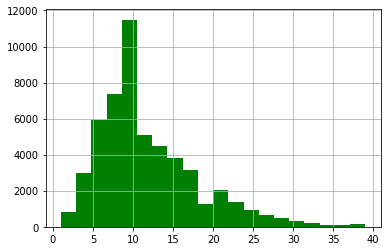

In [ ]:
plt.hist(notes_icd_agg.ICD9_CODE_x.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)

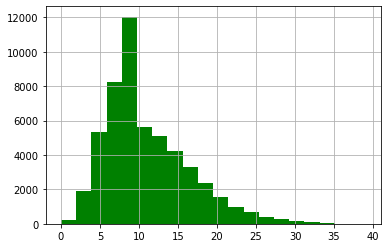

In [ ]:
plt.hist(notes_icd_agg.ICD9_CATEGORY.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)

# All MIMIC procedures

Procedure codes in the whole MIMIC dataset. There are 52243 AdmIDs are there for which there are 2009 ICD9 PCS codes.<br> In the discharge summary which has 52726 admids there are ICD9 PCS codes for only 46841 (5885 do not have any codes corresponding to them). There are total 1989 unique ICD9 PCS codes in the discharge summary.

In [ ]:
# all mimic procedures 
allmimic_procedure=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/PROCEDURES_ICD.csv')

In [ ]:
allmimic_procedure.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [ ]:
# unique admids for procedures
allmimic_procedure.HADM_ID.nunique()

52243

In [ ]:
# unique number of ICD9 pcs codes
allmimic_procedure.ICD9_CODE.nunique()

2009

In [ ]:
adm_icdpcs=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/Data1.0/adm_icdpcs.csv')

In [ ]:
adm_icdpcs

,HADM_ID,ICD9_CODE,icd10_pcs
0,100003,"4443,9607,9607,9904,3893","0W3.P8ZZ,0D9.670Z,0D9.680Z,Misc,Misc"
1,100006,"9390,9390,9390,9925,9925,9925,9925","5A0.9357,5A0.9457,5A0.9557,3E0.3305,3E0.4305,X..."
2,100007,"4562,5459","Misc,Misc"
3,100009,"3613,3615,3795,3961","Misc,Misc,Misc,5A1.221Z"
4,100010,"5551,540,403","Misc,Misc,Misc"
...,...,...,...
52238,199993,"3614,3512,3512,3512,3512,3512,3761,3761,8842,8...","Misc,027.G04Z,027.G0DZ,027.G0ZZ,02N.G0ZZ,02Q.G..."
52239,199994,"9671,9671,9604,9604,3995,3995,3891","5A1.935Z,5A1.945Z,0BH.17EZ,0BH.18EZ,5A1.D00Z,5..."
52240,199995,"3521,3961,3845,3539,8841,8847,9929,8872,3699","Misc,5A1.221Z,Misc,Misc,Misc,Misc,Misc,Misc,Misc"
52241,199998,"3612,3615,3964","Misc,Misc,Misc"


In [ ]:
len(set([a for b in adm_icdpcs.ICD9_CODE.apply(split_string_list).to_list() for a in b]))

2009

# NOTEEVENTS PROCEDURES

In [ ]:
noteevents_icdpcs=adm_icdpcs.loc[adm_icdpcs.HADM_ID.isin(admids_noteevents)]

In [ ]:
noteevents_icdpcs

,HADM_ID,ICD9_CODE,icd10_pcs
0,100003,"4443,9607,9607,9904,3893","0W3.P8ZZ,0D9.670Z,0D9.680Z,Misc,Misc"
1,100006,"9390,9390,9390,9925,9925,9925,9925","5A0.9357,5A0.9457,5A0.9557,3E0.3305,3E0.4305,X..."
2,100007,"4562,5459","Misc,Misc"
3,100009,"3613,3615,3795,3961","Misc,Misc,Misc,5A1.221Z"
4,100010,"5551,540,403","Misc,Misc,Misc"
...,...,...,...
52238,199993,"3614,3512,3512,3512,3512,3512,3761,3761,8842,8...","Misc,027.G04Z,027.G0DZ,027.G0ZZ,02N.G0ZZ,02Q.G..."
52239,199994,"9671,9671,9604,9604,3995,3995,3891","5A1.935Z,5A1.945Z,0BH.17EZ,0BH.18EZ,5A1.D00Z,5..."
52240,199995,"3521,3961,3845,3539,8841,8847,9929,8872,3699","Misc,5A1.221Z,Misc,Misc,Misc,Misc,Misc,Misc,Misc"
52241,199998,"3612,3615,3964","Misc,Misc,Misc"


# Discharge summaries ICDPCS

In [ ]:
notes_icd

,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,ISERROR,TEXT,text_mod,sec,split,service:,social history:,family history:,past medical history:,chief complaint:,discharge medications:,discharge disposition:,discharge diagnosis:,allergies:,physical exam:,ICD9_CODE_x,ICD10,ICD9_CODE_y,icd10_pcs
0,22532,167853.0,Discharge summary,Report,NaN,Admission Date: [**2151-7-16**] Dischar...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Servic...",['service: addendum: radiologic studies: ...,service: addendum: radiologic studies: ra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"01193,4254,4254,42731,2639,2762,5070,5119,2113","Misc,I425,I428,I4891,E46,E872,J690,J918,Misc","4542,3491,3491,3893,3891","Misc,0W9.93ZZ,0W9.B3ZZ,Misc,Misc"
1,13702,107527.0,Discharge summary,Report,NaN,Admission Date: [**2118-6-2**] Discharg...,admission date: <date> discharge date...,"['Admission Date:', 'Discharge Date:', 'Birth:...",[' service: micu and then to <name> medicine ...,service: micu and then to <name> medicine ...,"social history: lives with her husband, dr. ...",family history: noncontributory.,past medical history: 1. copd. last pulmona...,NaN,discharge medications: 1. levothyroxine 75 mc...,NaN,NaN,allergies: norvasc leads to lightheadedness ...,NaN,"5191,49121,51881,51881,486,2761,2449,311","Misc,Misc,J9600,J9690,J189,E871,E039,F329","9390,9390,9390,966,966,966,3199,9671,9671,9604...","5A0.9357,5A0.9457,5A0.9557,0DH.67UZ,0DH.68UZ,3..."
2,13702,167118.0,Discharge summary,Report,NaN,Admission Date: [**2119-5-4**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Servic...","[' service: cardiothoracic ', ' social hist...",service: cardiothoracic,social history: social history: the patient ...,family history: family history: (+) fhx cad;...,past medical history: copd flare [**6-7**] s...,"chief complaint: 81 yo f smoker w/ copd, sev...",discharge medications: 1. albuterol sulfate ...,discharge disposition: extended care faci...,"discharge diagnosis: copd, coronary artery di...",allergies: amlodipine attending:<name>,physical exam: admit h+p general-lovely 81 ...,"5191,5185,496,2762,45340,5533","Misc,Misc,J449,E872,Misc,Misc","3179,311,9672,9605,9605,9605,9605,9605,9605,96...","Misc,Misc,5A1.955Z,0B7.17DZ,0B7.18DZ,0BH.07DZ,..."
3,13702,196489.0,Discharge summary,Report,NaN,Admission Date: [**2124-7-21**] ...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Servic...","[' service: medicine ', ' social history: ...",service: medicine,social history: the patient is married and w...,family history: (+) fhx cad; father with an ...,past medical history: # copd flare fev1 40% ...,chief complaint: copd exacerbation/shortness...,discharge medications: 1. metoprolol succina...,discharge disposition: extended care faci...,discharge diagnosis: primary: 1. chronic obs...,allergies: amlodipine attending:<name>,physical exam: on admission vitals: t: bp: ...,"51884,5849,34830,49121,2760,4160,3594,5780,276...","Misc,N179,Misc,Misc,E870,Misc,Misc,Misc,E872,M...","9672,9604,9604,3891,3893,4513,966,966,966","5A1.955Z,0BH.17EZ,0BH.18EZ,Misc,Misc,0DJ.08ZZ,..."
4,26880,135453.0,Discharge summary,Report,NaN,Admission Date: [**2162-3-3**] D...,admission date: <date> dischar...,"['Admission Date:', 'Discharge Date:', 'Birth:...","[' service: medicine ', ' social history: ...",service: medicine,social history: patient recently discharged ...,family history: non contributory,past medical history: coronary artery diseas...,chief complaint: mr. <name> was seen at <hos...,discharge medications: 1. bisacodyl 10 mg su...,discharge disposition: extended care faci...,discharge diagnosis: 1. cervical spondylosis ...,allergies: patient recorded as having no kno...,physical exam: phycial exam prior to surgery...,"80506,5070,42823,2930,4538,E882,4280,4011,V450...","Misc,J690,Misc,F05,Misc,Misc,I509,Misc,Misc,I4...","8102,8103,353,8163,9671,9671,9604,9604","Misc,Misc,Misc,Misc,5A1.935Z,5A1.945Z,0BH.17EZ..."
...,.

In [ ]:
notes_icdpcs=notes_icd.dropna(subset=['ICD9_CODE_y'])

In [ ]:
notes_icdpcs.HADM_ID.nunique()

46841

In [ ]:
notes_icd_agg['ICD9_CODE_y']=notes_icd_agg.ICD9_CODE_y.apply(split_string_list)

In [ ]:
total_icd9pcscodes=[a for b in notes_icd_agg.ICD9_CODE_y.to_list() for a in b if a != '']

In [ ]:
dict_count_icd9pcscodes=dict(Counter(total_icd9pcscodes))
dict_count_icd9pcscodes=dict(sorted(dict_count_icd9pcscodes.items(),key=lambda x:x[1],reverse=True))

In [ ]:
len(set(total_icd9pcscodes))

1989

In [ ]:
len(dict_count_icd9pcscodes)

1989

Mean and median number of ICD9 PCS codes for each AdmIDs in the discharge summary table.

In [ ]:
notes_icd_agg.ICD9_CODE_y.apply(lambda x:len(set(x))).mean()

4.25439062322194

In [ ]:
notes_icd_agg.ICD9_CODE_y.apply(lambda x:len(set(x))).median()

3.0

In [ ]:
print(dict_count_icd9pcscodes)

{'3893': 12866, '9604': 9493, '966': 9102, '9671': 8426, '9904': 7102, '3961': 6781, '9672': 5815, '8856': 5045, '3891': 4449, '3615': 4387, '9915': 4162, '8872': 3305, '3722': 3147, '3995': 3133, '9390': 2656, '3723': 2619, '3324': 2607, '4513': 2552, '9955': 2275, '9983': 2183, '8853': 2066, '331': 1999, '9907': 1987, '3612': 1897, '311': 1752, '9920': 1636, '3491': 1590, '3404': 1545, '4311': 1519, '40': 1502, '3613': 1497, '3895': 1493, '3897': 1462, '5491': 1420, '3521': 1415, '8841': 1243, '66': 1226, '9905': 1211, '3606': 1166, '3607': 1100, '8964': 1049, '3322': 999, '3323': 994, '3601': 994, '3761': 986, '3611': 945, '45': 847, '17': 818, '8855': 808, '640': 805, '9962': 760, '387': 750, '4523': 744, '14': 732, '8842': 723, '5459': 675, '8847': 667, '9910': 654, '3950': 650, '8659': 647, '159': 604, '4443': 590, '9960': 588, '4516': 578, '8848': 561, '9605': 558, '3721': 551, '9607': 538, '8622': 538, '8852': 522, '3845': 517, '3522': 506, '9925': 498, '5187': 472, '131': 471,

<table>
<tr>
<th>type of dataset</th><th>Number of Adm ids</th><th>% coverage</th>
</tr>
<tr>
<td>Top10 ICD9 PCS codes</td><td>33304</td><td>71.10%</td>
</tr>
<tr>
<td>Top20 ICD9 PCS codes</td><td>37931</td><td>80.98%</td>
</tr>
<tr>
<td>Top50 ICD9 PCS codes</td><td>40493</td><td>86.45%</td>
</tr>
</table>

In [ ]:
top10_icd9pcscodes=list(dict_count_icd9pcscodes.keys())[:10]
top20_icd9pcscodes=list(dict_count_icd9pcscodes.keys())[:20]
top50_icd9pcscodes=list(dict_count_icd9pcscodes.keys())[:50]

In [ ]:
top10_icd9pcscodes

['3893', '9604', '966', '9671', '9904', '3961', '9672', '8856', '3891', '3615']

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_y.apply(lambda x:any(item in top10_icd9pcscodes for item in x))].HADM_ID.nunique()

33304

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_y.apply(lambda x:any(item in top20_icd9pcscodes for item in x))].HADM_ID.count()

37931

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_y.apply(lambda x:any(item in top50_icd9pcscodes for item in x))].HADM_ID.nunique()

40493

# ICD10 code

In [3]:
admid_icd=pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data1.0/adm_icd.csv')

In [4]:
admid_icd

,HADM_ID,ICD9_CODE,ICD10
0,100001,"5363,5853,36201,7078,V5867,25013,5849,25083,25...","N179,I129,Misc,Z794"
1,100003,"53789,4019,2851,5715,45621,53100,7823,07054,53550","I10,K740,K7460,K7469,Misc,D62,B182"
2,100006,"V1251,7850,20300,3090,2761,486,51881,V1582,49320","J189,Z86718,J9600,Z87891,Misc,J9690,E871"
3,100007,"4019,9973,5570,486,56081","J189,I10,Misc"
4,100009,"V153,4019,V4502,99604,41401,27800,4111,V5867,2...","I200,I2510,Z794,D649,I10,Z9861,E669,Z87891,Mis..."
...,...,...,...
58924,199993,"5180,42821,42731,4240,5119,4271,5184,2760,41031","J9819,I340,I4891,J918,Misc,J9811,E870,I472,I348"
58925,199994,"4280,585,3970,42732,2762,486,51881,496,4169","J189,E872,J9600,I4892,Misc,I509,J449,J9690"
58926,199995,"4210,04111,3051,V1259,4412,44284,7464,30503,30...","F17200,Misc"
58927,199998,"4019,42731,41401,4111,4439,4400,9975,V4589,997...","I200,I2510,I10,I97710,I9788,Z9861,I4891,I739,I..."


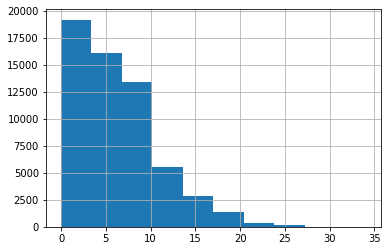

In [9]:
# distribution of number of ICD10 codes for given admid
plt.hist(admid_icd.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])))
plt.grid(True)

In [11]:
print(" Mean number of ICD10 codes for given admid :",sum(admid_icd.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])))/len(admid_icd))

 Mean number of ICD10 codes for given admid : 6.325663086086647


In [13]:
print(" Median number of ICD10 codes for given admid :",admid_icd.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).median())

 Median number of ICD10 codes for given admid : 5.0


In [20]:
icd10_freq=sorted(
    dict(
        Counter(
            [code for innerlist in admid_icd.ICD10.to_list() for code in re.split(',',innerlist) if code != 'Misc' ]
        )
    ).items(),
    key=lambda x:x[1],reverse=True
)

In [21]:
print(icd10_freq)

[('I10', 20696), ('I2510', 13910), ('I509', 13111), ('I4891', 12886), ('N179', 9118), ('E119', 9057), ('E784', 8689), ('E785', 8689), ('J9600', 7497), ('J9690', 7497), ('N390', 6555), ('K219', 6324), ('E780', 5930), ('Z23', 5779), ('P002', 5519), ('D649', 5405), ('E039', 4914), ('J189', 4838), ('D62', 4552), ('E872', 4528), ('J449', 4431), ('A419', 4277), ('R6520', 3912), ('Z7901', 3805), ('J690', 3680), ('Z3800', 3566), ('N189', 3435), ('F329', 3431), ('I129', 3421), ('F17200', 3358), ('I252', 3278), ('D696', 3065), ('Z951', 3056), ('I214', 3055), ('E871', 3039), ('I340', 2924), ('I348', 2924), ('Z87891', 2811), ('Z3801', 2758), ('J918', 2734), ('Z9861', 2725), ('I120', 2630), ('R6521', 2586), ('I359', 2550), ('I352', 2550), ('I350', 2550), ('I358', 2550), ('I351', 2550), ('Z794', 2538), ('R001', 2453), ('I498', 2453), ('G4733', 2380), ('I97710', 2343), ('I9788', 2343), ('I97790', 2343), ('I9789', 2343), ('N170', 2287), ('E870', 2272), ('P590', 2264), ('J45909', 2195), ('J45998', 2195

# ICD10 code PCS

In [22]:
admid_icdpcs=pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data1.0/adm_icdpcs.csv')

In [23]:
admid_icdpcs

,HADM_ID,ICD9_CODE,icd10_pcs
0,100003,"3893,9904,9607,4443","0D9.670Z,Misc,0W3.P8ZZ,0D9.680Z"
1,100006,"9925,9390","5A0.9557,3E0.3305,5A0.9457,XW0.3351,3E0.4305,5..."
2,100007,"4562,5459",Misc
3,100009,"3615,3961,3795,3613","5A1.221Z,Misc"
4,100010,"5551,540,403",Misc
...,...,...,...
52238,199993,"8848,9604,3512,3761,3614,9672,9390,3404,8842,3...","0W9.B30Z,02N.G0ZZ,5A0.9557,02Q.G0ZZ,5A0.9457,0..."
52239,199994,"9671,3995,9604,3891","5A1.D00Z,5A1.945Z,0BH.18EZ,Misc,5A1.935Z,5A1.D..."
52240,199995,"3521,9929,8841,3845,3539,3961,3699,8847,8872","5A1.221Z,Misc"
52241,199998,"3615,3612,3964",Misc


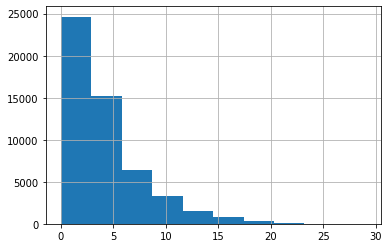

In [24]:
# distribution of number of ICD10 PCS codes for given admid
plt.hist(admid_icdpcs.icd10_pcs.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])))
plt.grid(True)

In [25]:
print(" Mean number of ICD10 PCS codes for given admid :",sum(admid_icdpcs.icd10_pcs.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])))/len(admid_icdpcs))

 Mean number of ICD10 PCS codes for given admid : 3.7746109526635148


In [26]:
print(" Median number of ICD10 PCS codes for given admid :",admid_icdpcs.icd10_pcs.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).median())

 Median number of ICD10 PCS codes for given admid : 3.0


In [27]:
icd10pcs_freq=sorted(
    dict(
        Counter(
            [code for innerlist in admid_icdpcs.icd10_pcs.to_list() for code in re.split(',',innerlist) if code != 'Misc' ]
        )
    ).items(),
    key=lambda x:x[1],reverse=True
)

In [29]:
print(icd10pcs_freq)

[('0BH.18EZ', 9882), ('0BH.17EZ', 9882), ('0DH.68UZ', 9241), ('3E0.G36Z', 9241), ('0DH.67UZ', 9241), ('5A1.935Z', 8904), ('5A1.945Z', 8904), ('5A1.221Z', 6809), ('5A1.955Z', 5930), ('3E0.234Z', 5813), ('3E0.134Z', 5813), ('3E0.436Z', 4233), ('3E0.336Z', 4233), ('3E0.536Z', 4233), ('3E0.636Z', 4233), ('4A0.20N7', 3209), ('4A0.23N7', 3209), ('5A1.D00Z', 3207), ('5A1.D60Z', 3207), ('5A0.9557', 2720), ('5A0.9457', 2720), ('5A0.9357', 2720), ('4A0.23N8', 2669), ('4A0.20N8', 2669), ('0DJ.08ZZ', 2614), ('6A6.00ZZ', 2400), ('0BJ.08ZZ', 2277), ('0VT.T4ZZ', 2123), ('0VT.T0ZZ', 2123), ('0VT.TXZZ', 2123), ('0BJ.L8ZZ', 1996), ('0BJ.K8ZZ', 1996), ('0W9.B3ZZ', 1613), ('0W9.93ZZ', 1613), ('0W9.B30Z', 1571), ('0W9.B40Z', 1571), ('0W9.930Z', 1571), ('0W9.940Z', 1571), ('0DH.64UZ', 1532), ('0DH.63UZ', 1532), ('06H.Y33Z', 1526), ('05H.Y33Z', 1526), ('302.53R1', 1233), ('302.63R1', 1233), ('302.33R1', 1233), ('302.43R1', 1233), ('5A0.2210', 1010), ('5A0.2110', 1010), ('5A2.204Z', 778), ('0DJ.D8ZZ', 765), (